In [2]:
import pandas as pd

In [2]:
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineering']
duration = [2,3,6,4]
df = pd.DataFrame(data={'course_name': course_name, 'duration': duration})

### Q1. Write a code to print the data present in the second row of the dataframe, df.

In [9]:
df[1:2][:]

,course_name,duration
1,Machine Learning,3


In [12]:
df.iloc[1,:]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

### Q2. What is the difference between the functions loc and iloc in pandas.DataFrame?

loc can be used using index positions as well as labels of columns and index whereas iloc is used to select data using integer-based indexing.

### Q3. Reindex the given dataframe using a variable, reindex = [3,0,1,2] and store it in the variable, new_df then find the output for both new_df.loc[2] and new_df.iloc[2].

In [17]:
new_df=df.reindex([3,0,1,2])
print(new_df)
print(new_df.loc[2])
print(new_df.iloc[2])

        course_name  duration
3  Data Engineering         4
0      Data Science         2
1  Machine Learning         3
2          Big Data         6
course_name    Big Data
duration              6
Name: 2, dtype: object
course_name    Machine Learning
duration                      3
Name: 1, dtype: object


### Did you observe any difference in both the outputs? If so then explain it.
Yes, the difference is .loc is selecting the row with index label as 2 whereas .iloc is selecting the row of position 2 or we can say by default index 2

### Q4. Write a code to find the following statistical measurements for the above dataframe df1:
(i) mean of each and every column present in the dataframe.

In [36]:
import numpy as np
columns=['column_1','column_2','column_3','column_4','column_5','column_6']
indices=[1,2,3,4,5,6]
df1=pd.DataFrame(np.random.rand(6,6), columns=columns, index=indices)

In [19]:
df1.mean()

column_1    0.716941
column_2    0.273998
column_3    0.636123
column_4    0.560813
column_5    0.527942
column_6    0.496568
dtype: float64

(ii) standard deviation of column, ‘column_2’

In [20]:
df1['column_2'].std()

0.16129701163439936

### Replace the data present in the second row of column, ‘column_2’ by a string variable then find the mean of column, column_2.
If you are getting errors in executing it then explain why.

In [38]:
df1.loc[1:,'column_2']=["t","r",'i','s','h','a']
df1['column_2'].mean()

TypeError: Could not convert trisha to numeric

yes, because we can't get mean of string values

### Q6. What do you understand about the windows function in pandas and list the types of windows functions? 

In Pandas, a "window function" (also known as a "rolling" or "moving" function) is a way to perform calculations on a set of data points within a sliding or rolling window of a specified size along a time series or DataFrame. 
- rolling().mean()
- rolling().sum()
- rolling().min()
- rolling().max()
- rolling().std()
- rolling().var()
- expanding().mean(): Calculates the mean of all data points up to the current point.
- expanding().sum(): Calculates the sum of all data points up to the current point.
- ewm().mean(): Calculates the exponential moving average, which gives more weight to recent data points.
- rolling().rank()
- rolling().quantile()
- rolling().quantile(q=0.5)
- rolling().apply()

### Q7. Write a code to print only the current month and year at the time of answering this question.
[Hint: Use pandas.datetime function]

In [9]:
c_d=pd.to_datetime('now')
print(c_d.month_name())
print(c_d.year)

September
2023


### Q8. Write a Python program that takes in two dates as input (in the format YYYY-MM-DD) and calculates the difference between them in days, hours, and minutes using Pandas time delta. The program should prompt the user to enter the dates and display the result.

In [15]:
x=input("Enter First Date")
y=input("Enter Second Date")
x=pd.to_datetime(x)
y=pd.to_datetime(y)
td=pd.Timedelta(x-y)
print(td)


Enter First Date2023-04-06
Enter Second Date2023-07-08
-93 days +00:00:00


### Q9. Write a Python program that reads a CSV file containing categorical data and converts a specified column to a categorical data type. The program should prompt the user to enter the file path, column name, and category order, and then display the sorted data.

In [39]:
path=input("Enter File path")
col_name=input('Enter column Name')
order=input("Enter the category order 1 for increasing 0 for decreasing")
def p(x):
    v=''
    for i in x:
        i=i.replace('\\',"/")
        v+=i
    return v
print(p(path))
df=pd.read_csv(p(path))
if(order==1):
    k=True
else:
    k=False
print(df[col_name].sort_values(ascending=k))


Enter File pathC:\\Users\\TRISHA ROY\\Downloads\\world_population.csv
Enter column Name2010 Population
Enter the category order 1 for increasing 0 for decreasing0
C://Users//TRISHA ROY//Downloads//world_population.csv
41     1348191368
92     1240613620
221     311182845
93      244016173
27      196353492
          ...    
137          4938
64           3187
150          1812
209          1367
226           596
Name: 2010 Population, Length: 234, dtype: int64


### Q10. Write a Python program that reads a CSV file containing sales data for different products and visualizes the data using a stacked bar chart to show the sales of each product category over time. The program should prompt the user to enter the file path and display the chart.

Enter File pathC:\Users\TRISHA ROY\Downloads\Sales.csv
Enter category NameCategory
C:/Users/TRISHA ROY/Downloads/Sales.csv
                        Category  Sales
Category                               
Furniture        Office supplies  22602
Office supplies        Furniture  20481
Technology            Technology  23846


<Axes: xlabel='Category'>

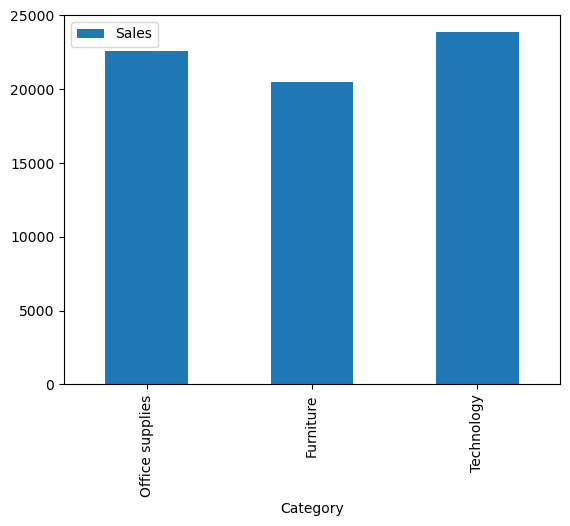

In [84]:
path=input("Enter File path")
cat_name=input("Enter category Name")
def p(x):
    v=''
    for i in x:
        i=i.replace('\\',"/")
        v+=i
    return v
print(p(path))
df=pd.read_csv(p(path))
g=df.groupby('Category')
r=pd.DataFrame({cat_name:df[cat_name].unique(),
                'Sales':g.sum()['Sales']})
print(r)
r.plot.bar(x=cat_name,y='Sales')

### Q11. You are given a CSV file containing student data that includes the student ID and their test score. Write a Python program that reads the CSV file, calculates the mean, median, and mode of the test scores, and displays the results in a table.

In [87]:
path=input("Enter File path")
def p(x):
    v=''
    for i in x:
        i=i.replace('\\',"/")
        v+=i
    return v
df=pd.read_csv(p(path))
Statistic=['Mean','Median','Mode']
Value=[df['Test Score'].mean(),df['Test Score'].median(),df['Test Score'].mode()]
table=pd.DataFrame({'Statistic':Statistic,
                   'Value':Value})
print(table)
print(Value)

Enter File pathC:\Users\TRISHA ROY\Downloads\student_data.csv
  Statistic                 Value
0      Mean                  83.5
1    Median                  85.0
2      Mode  0    85
dtype: int64
[83.5, 85.0, 0    85
dtype: int64]
